In [1]:
import pandas as pd
import os
from os.path import isfile, join
import time
import re
import numpy as np
import pandas as pd
import re
import pickle
import pandas as pd
import itertools
from collections import Counter
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.models import word2vec
from sklearn.linear_model import LogisticRegression
import os
import string

/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import pickle
LG = pickle.load(open('lg.sav', 'rb'))

In [3]:
import tarfile
fname = "aclImdb_v1.tar.gz"
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

In [4]:
os.getcwd()
os.listdir()

['binary_f.csv',
 'IMDB.ipynb',
 'aclImdb_v1.tar.gz',
 'lg.sav',
 '.ipynb_checkpoints',
 'aclImdb']

In [3]:
filePath = [ "./aclImdb/test/", "./aclImdb/train/"]
tag = [ "neg/","pos/"]
for i in filePath:
    for j in tag:
        start = time.time()
        path = i+j
        onlyfiles = [f for f in os.listdir(path) if isfile(join(path, f))]
# onlyfiles

In [4]:
Xtrain = []
ytrain = [1] * len(onlyfiles)
filedir = "./aclImdb/train/pos/"
for file in onlyfiles:
    path = filedir + file
    rating = re.findall("[0-9]+_([0-9]+).txt", file)[0]
    with open(path, "r") as f:
        contents = f.read()
        Xtrain.append([contents, rating])

In [5]:
train = pd.DataFrame(Xtrain, columns = ["text", 'rating'])
train['label'] = ytrain
train.head()

,text,rating,label
0,The very first image of the movie shows a moun...,8,1
1,I saw the The Bourne Ultimatum last summer wit...,9,1
2,This show is so incredibly hilarious that I co...,10,1
3,"Rod Serling was, of course, a genius and his w...",8,1
4,"Sure, the plot isn't Oldboy. It seems the only...",9,1


In [6]:
filePath = [ "./aclImdb/test/", "./aclImdb/train/"]
tag = [ "pos/","neg/"]
for i in filePath:
    for j in tag:
        start = time.time()
        path = i+j
        onlyfiles = [f for f in os.listdir(path) if isfile(join(path, f))]
        end = time.time()
        print(f"Detect {len(onlyfiles)} files at the current path:'{path}', time: {round(end-start, 4)}s.")
# onlyfiles

Detect 12500 files at the current path:'./aclImdb/test/pos/', time: 0.0888s.
Detect 12500 files at the current path:'./aclImdb/test/neg/', time: 0.0815s.
Detect 12500 files at the current path:'./aclImdb/train/pos/', time: 0.0816s.
Detect 12500 files at the current path:'./aclImdb/train/neg/', time: 0.0816s.


In [7]:
Xtrain = []
ytrain = [0] * len(onlyfiles)
filedir = "./aclImdb/train/neg/"
start = time.time()
for file in onlyfiles:
    path = filedir + file
    rating = re.findall("[0-9]+_([0-9]+).txt", file)[0]
    with open(path, "r") as f:
        contents = f.read()
        Xtrain.append([contents, rating])
end = time.time()
print("Time :{}s.".format(round(end- start, 4)))

Time :0.3875s.


In [8]:
train_neg = pd.DataFrame(Xtrain, columns = ["text", 'rating'])
train_neg['label'] = ytrain
train_neg.head()

,text,rating,label
0,....ripoff of a dozen better films. Particular...,1,0
1,'P' (or Club-P) should really be called 'L' fo...,3,0
2,When his in-laws are viciously murdered by a g...,2,0
3,Otto Preminger directs this light as a feather...,4,0
4,"About 4 years ago, I liked this movie. I would...",4,0


In [9]:
train_total = pd.concat([train,train_neg]).reset_index()
train_total = preprocess_df(train_total)

In [2]:
import nltk
nltk.download('punkt') # downloads a model
nltk.download('stopwords') # <--- this is new
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from nltk.stem import PorterStemmer 

ps = PorterStemmer() 

# return a list of tokens
def pre_processing_by_nltk(doc, stemming = True, need_sent = False):
    # step 1: get sentences 
    #sentences = re.sub(r'[^\w\s]', ' ', doc)
    #sentences = sent_tokenize(sentences)
    # step 2: get tokens
    #tokens = []
    #for sent in sentences:
    words = word_tokenize(doc)
        # step 3 (optional): stemming
    if stemming:
        words = [ps.stem(word) for word in words]
#     if need_sent:
#         tokens.append(words)
#     else:
#         tokens += words
    return [w.lower() for w in words]

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def preprocess_df(df):
    # get English stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.add('would')
    # prepare translation table to translate punctuation to space
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    preprocessed_sentences = []
    for i, row in df.iterrows():
        sent = row["text"]
        sent_nopuncts = sent.translate(translator)
        words_list = sent_nopuncts.strip().split()
        filtered_words = [ps.stem(word) for word in words_list if word not in stop_words and len(word) != 1] # also skip space from above translation
        preprocessed_sentences.append(" ".join(filtered_words))
    df["text"] = preprocessed_sentences
    return df

In [26]:
filePath = [ "./aclImdb/test/"]
tag = [ "pos/"]
for i in filePath:
    for j in tag:
        start = time.time()
        path = i+j
        onlyfiles = [f for f in os.listdir(path) if isfile(join(path, f))]
        end = time.time()
        print(f"Detect {len(onlyfiles)} files at the current path:'{path}', time: {round(end-start, 4)}s.")
# onlyfiles

Detect 12500 files at the current path:'./aclImdb/test/pos/', time: 0.1043s.


In [27]:
Xtest = []
ytest = [1] * len(onlyfiles)
filedir = "./aclImdb/test/pos/"
start = time.time()
for file in onlyfiles:
    path = filedir + file
    rating = re.findall("[0-9]+_([0-9]+).txt", file)[0]
    with open(path, "r") as f:
        contents = f.read()
        Xtest.append([contents, rating])
end = time.time()
print("Time :{}s.".format(round(end- start, 4)))

Time :0.5295s.


In [28]:
test_pos = pd.DataFrame(Xtest, columns = ["text", 'rating'])
test_pos['label'] = ytest
test_pos.head()

,text,rating,label
0,You think the police are always right.<br /><b...,9,1
1,The film is about the battle of Stalingrad. Fo...,8,1
2,This is my favorite love story it has every el...,10,1
3,The movie shows many feelings and emotions tha...,10,1
4,I'm surprised with the amount of negative revi...,8,1


In [29]:
filePath = [ "./aclImdb/test/"]
tag = [ "neg/"]
for i in filePath:
    for j in tag:
        start = time.time()
        path = i+j
        onlyfiles = [f for f in os.listdir(path) if isfile(join(path, f))]
        end = time.time()
        print(f"Detect {len(onlyfiles)} files at the current path:'{path}', time: {round(end-start, 4)}s.")
# onlyfiles

Detect 12500 files at the current path:'./aclImdb/test/neg/', time: 0.0971s.


In [30]:
Xtest = []
ytest = [0] * len(onlyfiles)
filedir = "./aclImdb/test/neg/"
start = time.time()
for file in onlyfiles:
    path = filedir + file
    rating = re.findall("[0-9]+_([0-9]+).txt", file)[0]
    with open(path, "r") as f:
        contents = f.read()
        Xtest.append([contents, rating])
end = time.time()
print("Time :{}s.".format(round(end- start, 4)))

Time :0.3425s.


In [31]:
test_neg = pd.DataFrame(Xtest, columns = ["text", 'rating'])
test_neg['label'] = ytest
test_neg.head()

,text,rating,label
0,"What a silly movie. While it looks nice, it do...",4,0
1,If you never have read the book and never inte...,1,0
2,An American family moves to the countryside of...,4,0
3,"As to be expected, there's a pretty good reaso...",2,0
4,"OK, we got JP from Grandma's Boy and Chuck fro...",3,0


In [32]:
test_total = pd.concat([test_pos,test_neg])
test_total = test_total.sample(frac=1)
test_total = preprocess_df(test_total)
test_total.to_csv('test_processed.csv')

### Save the processed train and test dataframe for faster access

In [16]:
train_total.to_csv('train_processed.csv')
test_total.to_csv('test_processed.csv')

In [17]:
tagged_data = [word_tokenize(_d) for i, _d in enumerate(train_total["text"])]

In [18]:
from collections import defaultdict
freq = defaultdict(int)
for doc in tagged_data:
    for token in doc:
        freq[token] += 1

In [16]:
#dict(sorted(freq.items(), key=lambda item: item[1],reverse = True))

### apply manual cutoff to select term with frequency between 30 and 25000

In [19]:
freq_copy = freq.copy()
for key, value in freq_copy.items():
    if value < 30 or value > 25000 :
        del freq[key]

In [20]:
len(freq.keys())

7911

In [22]:
from math import log
IDF, vocab = dict(), dict()
for token in freq:
    vocab[token] = len(vocab) #create a fix index of all words
    IDF[token] = log(1 + len(train_total) / freq[token]) #

In [23]:
def vocabEXIST(doc,freqdic):
    tokens = doc.split(' ')
    #tokens = pre_processing_by_nltk(doc)
    x= [0]*len(freqdic.keys())
    cor = list(freqdic.keys())
    for i in range(len(freqdic.keys())):
        if cor[i] in tokens:
            x[i] = 1
    return x

In [24]:
train_total = train_total.sample(frac=1)

In [28]:
X_train_1 = []
X_test_1 = []
for doc in train_total['text']: #create a feature vector 
    X_train_1.append(vocabEXIST(doc, freq))
    if len(X_train_1) == 10000:
        print(1000)

1000


In [32]:
df = pd.DataFrame(X_train_1)
df.to_csv('binary_f.csv',index = False)

In [39]:
from sklearn.linear_model import LogisticRegression
M1 = LogisticRegression(random_state=0,max_iter=1000000,solver = 'sag').fit(X_train_1,train_total['label'])

In [40]:
filename = 'lg.sav'
pickle.dump(M1, open(filename, 'wb'))

In [34]:
X_test_1 = []

for doc in test_total['text']: #create a feature vector 
    X_test_1.append(vocabEXIST(doc, freq))
    if len(X_test_1) == 100:
        print(100)
    if len(X_test_1) == 1000:
        print(1000)
    if len(X_test_1) == 10000:
        print(1000)

100
1000
1000


In [35]:
predict_y1 = LG.predict(X_test_1)

In [36]:
import sklearn
macro_f1_1 = sklearn.metrics.f1_score(test_total['label'], predict_y1,average='macro')
micro_f1_1 = sklearn.metrics.f1_score(test_total['label'], predict_y1,average='micro')
print('macro F1 is ',macro_f1_1, 'micr F1 is ',micro_f1_1)

macro F1 is  0.8551197626282191 micr F1 is  0.85512


In [37]:
auc = sklearn.metrics.roc_auc_score(test_total['label'], LG.predict_proba(X_test_1)[:, 1])
print('AUC F1 is ',auc)

AUC F1 is  0.9266428096000001


In [38]:
auc

0.9266428096000001

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def evaluate(ytest, ypred, name):
    ypred_label = np.argmax(ypred, axis = 1)
    ypred_proba = ypred[:,1]
    accu = accuracy_score(ytest, ypred_label)
    f1 = f1_score(ytest, ypred_label)
    AUC = roc_auc_score(ytest, ypred_proba)
    fpr, tpr, _ = roc_curve(ytest, ypred_proba)
    
    lw = 2
    plt.figure(figsize = (6,6))
    plt.plot(fpr, tpr, lw = lw, label="ROC curve of model {}, AUC = ({:0.2f})".format(name, AUC))
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    
    df = pd.DataFrame()
    df = df.assign(
        model = [name],
        accuracy = [accu],
        f1_score = [f1],
        AUC = [AUC]
    )
    print(df)
    return df

In [43]:
df_b_result = pd.DataFrame(
    {'label': test_total['label'],
     'predict': LG.predict_proba(X_test_1)[:, 1]})

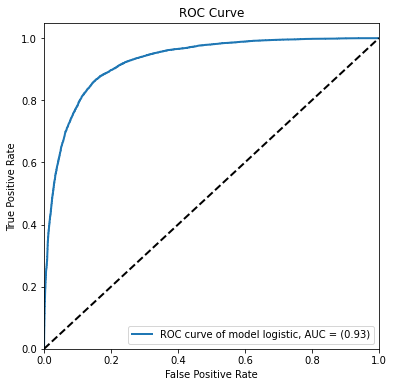

      model  accuracy  f1_score       AUC
0  logistic   0.85512  0.854934  0.926643


In [51]:
df_b_result.to_csv('bi_df.csv')
df_b = evaluate(test_total['label'],LG.predict_proba(X_test_1),'binary_logit')